In [1]:
import pymysql
import pickle
import json

import math
import numpy as np
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

import os
import time
import hdbscan


In [2]:
path2dir = 'track_communities_data_processing/frac2/'
name_prefix = 'year_clusters_fract2_sample'


In [3]:
# organize samples:

In [4]:
files_list = [f for f in os.listdir(path2dir) if name_prefix in f]
files_list = np.sort(files_list)  # order by sample #

print(files_list)

['year_clusters_fract2_sample0_samples.json'
 'year_clusters_fract2_sample1_samples.json'
 'year_clusters_fract2_sample2_samples.json'
 'year_clusters_fract2_sample3_samples.json'
 'year_clusters_fract2_sample4_samples.json']


In [5]:
# plot averaged -1 interzones - is there stability?

In [6]:
# initialize
fname = files_list[0]  # assume each sample covers the same years
path = path2dir + fname

with open(path, 'r') as f:
    year_data = json.load(f)
print("sample fraction: {}".format(year_data['sample_fraction']))

years = []  # get the years included in this sample
merged_years = {}
for key in year_data.keys():
    if key.isnumeric():
        years.append(key)
        merged_years[key] = []  # list of embeddings with lable == -1
years = np.sort(years)


sample fraction: 0.2


In [7]:

for fname in files_list:
    print("processing {}".format(fname))
    
    path = path2dir + fname
    with open(path, 'r') as f:
        year_data = json.load(f)
    print("sample fraction: {}".format(year_data['sample_fraction']))
    
    years = []  # get the years included in this sample
    for key in year_data.keys():
        if key.isnumeric():
            years.append(key)
    years = np.sort(years)
    
    for i_year, year in enumerate(years):  # for each year
        
        for i_label, label in enumerate(year_data[year]['labels']):
            if label == -1:
                this_embedding = year_data[year]['embedding'][i_label][:]
                merged_years[year].append(this_embedding)

for year in years:
    merged_years[year] = np.array(merged_years[year])

processing year_clusters_fract2_sample0_samples.json
sample fraction: 0.2
processing year_clusters_fract2_sample1_samples.json
sample fraction: 0.2
processing year_clusters_fract2_sample2_samples.json
sample fraction: 0.2
processing year_clusters_fract2_sample3_samples.json
sample fraction: 0.2
processing year_clusters_fract2_sample4_samples.json
sample fraction: 0.2


1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2013
2014
2015
2016
2017
2018


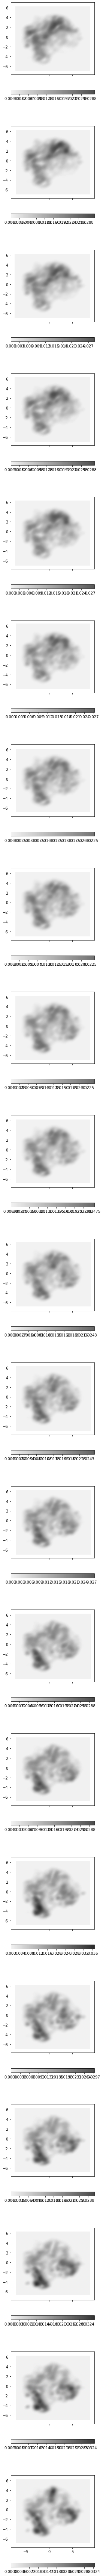

In [8]:
# plotting:


(f, axs) = plt.subplots(len(years),
                    1,
                   sharex='all',
                   sharey='all',
                   figsize=(4,6*len(years)))
    
for i_year, year in enumerate(years):  # for each year
    print(year)

    # plot distribution of non-clustered samples  (aggregated)
    #    i.e. the -1 labeled clusters
    xx_ = merged_years[year][:,0]
    yy_ = merged_years[year][:,1]
    sns.kdeplot(xx_,
                yy_,
                n_levels=100,
                shade=True,
                shade_lowest=True,
                color=[0.1, 0.1, 0.1, 1.0],
                ax=axs[i_year],
                vmin=0,
                vmax=0.04,
                cbar=True,
                cbar_kws={'orientation':'horizontal'})
    #axs[2].set_title('{}: remainder'.format(title))

path = path2dir + 'interzone'
plt.savefig('{}.png'.format(path))
plt.savefig('{}.eps'.format(path))


1998


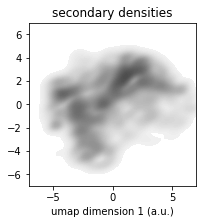

1999


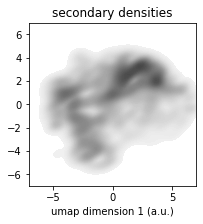

2000


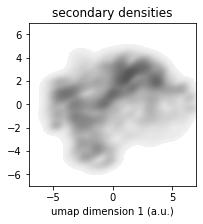

2001


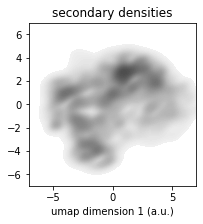

2002


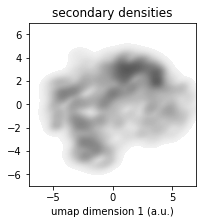

2003


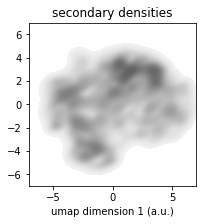

2004


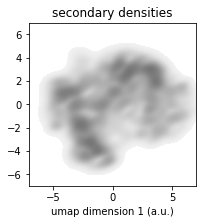

2005


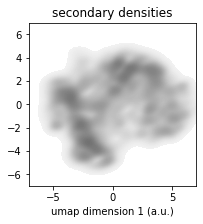

2006


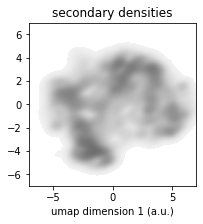

2007


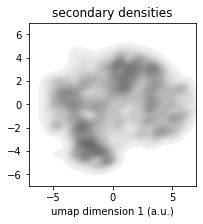

2008


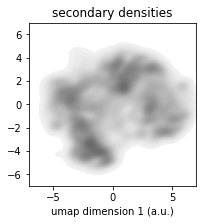

2009


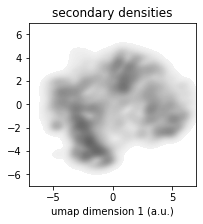

2010


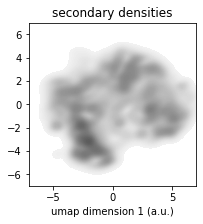

2011


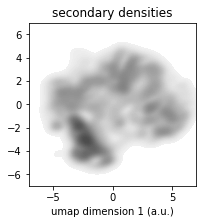

2012


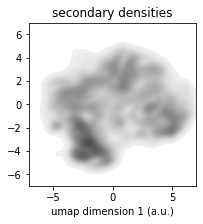

2013


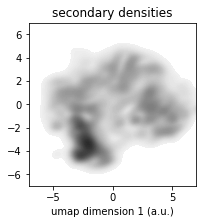

2014


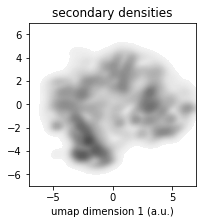

2015


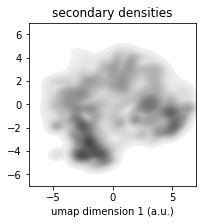

2016


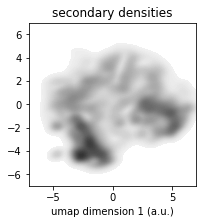

2017


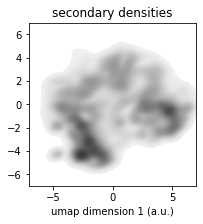

2018


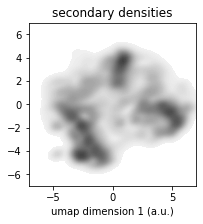

In [11]:
# cbar doesn't correctly reflect density
#   quick fix - remove cbar
#    todo fix this properly

# todo plot cluster outlines over the top

# plotting:


#(f, axs) = plt.subplots(len(years),
#                    1,
#                   sharex='all',
#                   sharey='all',
#                   figsize=(4,6*len(years)))
    
for i_year, year in enumerate(years):  # for each year
    print(year)

    plt.figure(figsize=(3,3))
    # plot distribution of non-clustered samples  (aggregated)
    #    i.e. the -1 labeled clusters
    xx_ = merged_years[year][:,0]
    yy_ = merged_years[year][:,1]
    sns.kdeplot(xx_,
                yy_,
                n_levels=100,
                shade=True,
                shade_lowest=False,
                color=[0.1, 0.1, 0.1, 1.0],
                vmin=0,
                vmax=0.04,
                cbar=False,
                cbar_kws={'orientation':'horizontal'})
    plt.xlim([-7,7])
    plt.ylim([-7,7])
    plt.xlabel('umap dimension 0 (a.u.)')
    plt.xlabel('umap dimension 1 (a.u.)')
    plt.title('secondary densities')

    path = path2dir + 'interzone_{}'.format(year)
    plt.savefig('{}.png'.format(path))
    plt.savefig('{}.eps'.format(path))
    plt.show()
